<a href="https://colab.research.google.com/github/JoaoDaross/ProjetoFinalAwari/blob/main/ProjetoFinalAwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I - Exposição do problema

Esta etapa consiste em apresentar um panorama da situação em que seu projeto se encaixa, demonstrar o problema que você buscará resolver através da utilização de dados e justificar sua relevância.

**PROJETO FINAL AWARI**


O CEO da empresa de consultoria XPTO verificou a grande demanda por profissionais que trabalhem com dados e como muitos de seus clientes estão contratando esse perfil profissional, ele precisa de informações para orientar seus clientes em relação a proposta salarial. 




# II - Coleta ou Importação dos Dados

In [ ]:
# Importando as bibliotecas 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Carregando o dataset. 
fonte = "https://raw.githubusercontent.com/JoaoDaross/ProjetoFinalAwari/main/data_scraped.csv"

df_raw = pd.read_csv(fonte)

# Visualisando as primeiras linhas do dataset
df_raw.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# III - Preparação dos dados

In [ ]:
# Excluindo as colunas que não iremos utilizar.
df_raw.drop('Unnamed: 0', axis=1, inplace=True)
df_raw.drop('Job Description', axis=1, inplace=True)
df_raw.drop('Company Name', axis=1, inplace=True)
df_raw.drop('Competitors', axis=1, inplace=True)

In [ ]:
# Padronizando a coluna "Job Title"
df_raw['Job Title'].replace(
    to_replace=['Sr. Enterprise Account Exec- Data Science / ML - NYC','Senior Manager, Epidemiologic Data Scientist','Senior Risk Data Scientist','Senior Data Scientist 4 Artificial Intelligence','Senior Scientist Protein/Oligonucleotides','Senior Insurance Data Scientist','Senior Research Analytical Scientist-Non-Targeted Analysis','Senior Clinical Lab Scientist, Clinical Lab Svcs - FT/Nights (8hr)','Senior Director Biometrics and Clinical Data Management','Sr. Scientist - Digital & Image Analysis/Computational Pathology','Sr Software Engineer (Data Scientist)','Sr. Data Scientist - Analytics, Personalized Healthcare (PHC)','Senior Data Scientist Artificial Intelligence','Senior LiDAR Data Scientist','Senior Data & Machine Learning Scientist','Senior Scientist - Biostatistician','Senior Scientist - Biostatistician ','Senior Data Scientist Oncology','Senior Scientist - Neuroscience','Sr Scientist, Immuno-Oncology - Oncology','Sr Expert Data Science, Advanced Visual Analytics (Associate level)','Senior Scientist - Toxicologist - Product Integrity (Stewardship)','Senior Scientist, Cell Pharmacology/Assay Development','Data Scientist SR','Scientist/Senior Scientist, Autoimmune','Senior Scientist, Logic Gated CAR T Cell Therapy','Senior Data Scientist / Machine Learning','Senior Scientist (Neuroscience)','Sr. Data Scientist II','Senior Scientist - Regulatory Submissions','Sr. Scientist, Quantitative Translational Sciences','Senior Data Scientist - AI Forecasting, Finance team','Senior Data Scientist - Algorithms','Sr. Data Scientist','Sr Data Scientist','Data Scientist, Senior','Senior Data Scientist Statistics','Senior Data Scientist','Data Scientist Manager','Data Science Manager','Senior Formulations Scientist II',
                'Jr. Data Scientist','Staff Data Scientist - Technology','Scientist, Immuno-Oncology','Machine Learning Research Scientist','Pricipal Scientist Molecular and cellular biologist','MED TECH/LAB SCIENTIST - LABORATORY','Associate Principal Scientist, Pharmacogenomics','Medical Lab Scientist - MLT','Quality Control Scientist','PL Actuarial-Lead Data Scientist','Customer Data Scientist','Data Scientist - Health Data Analytics','Scientist Manufacturing Pharma - Kentucky BioProcessing','Principal Scientist - Immunologist','Data Scientist / Machine Learning Expert','Medical Lab Scientist - MLT ','Data Scientist, Office of Data Science','Associate Director/Director, Safety Scientist','Principal Data Scientist with over 10 years experience','Staff Data Scientist','Digital Health Data Scientist','Data Scientist (Actuary, FSA or ASA)','Clinical Laboratory Scientist','Head Data Scientist – Image Analytics lead, Novartis AI Innovation Lab','UX Data Scientist (Python)','Principal Scientist, Hematology','Scientist - Analytical Services','Principal Data Scientist (Computational Chemistry)','Head Data Scientist – NLP lead, Novartis AI Innovation Lab','Data Scientist (Active TS SCI with Polygraph)','Managing Data Scientist/ML Engineer','Scientist, Bacteriology','Staff Scientist- Upstream PD','Scientist - Analytical Development - Pharmaceutics','RESEARCH COMPUTER SCIENTIST - RESEARCH ENGINEER - SR. COMPUTER SCIENTIST - SOFTWARE DEVELOPMENT','Principal Data Scientist (Computational Chemistry','Excel / VBA / SQL Data Analyst','Data Analytics Project Manager','College Hire - Data Scientist - Open to December 2019 Graduates','Scientist','Risk and Analytics IT, Data Scientist','Data Scientist in Artificial Intelligence Early Career','Scientist, Analytical Development','Director Data Science','Scientist, Product Development','Director II, Data Science - GRS Predictive Analytics','Scientist, Pharmacometrics','Data Scientist - Algorithms & Inference','Data Scientist - Systems Engineering','Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence','Product Engineer – Spatial Data Science and Statistical Analysis','Senior Imagery Scientist - SAR TO 11 #78 (TS/SCI)','Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad','Scientist Manufacturing - Kentucky BioProcessing','Machine Learning Engineer - Regulatory','Research Scientist – Security and Privacy','Technology-Minded, Data Professional Opportunities','Associate Environmental Scientist - Wildlife Biologist','Sr. Scientist Method Development','Research Scientist – Security and Privacy ','Computational Chemist/Data Scientist','Scientist, Upstream Process Development (Bioreactors)','Scientist - Biomarker and Flow Cytometry','Medical Lab Scientist','Principal, Data Science - Advanced Analytics','Principal Scientist, Chemistry & Immunology','Associate, Data Science, Internal Audit','Clinical Data Scientist','Scientist – Cancer Drug Discovery','Project Scientist - Auton Lab, Robotics Institute','PV Scientist','Staff Machine Learning Scientist, AI Foundation','Geospatial Software Developer and Data Scientist','Data Scientist - Quantitative','Front-End, Back-End, Fullstack Developers & Data Scientist / Researchers - Cleared OR CLEARABLE (Up to 25% Profit Sharing Benefit!)','VP, Data Science','Deep Learning/Computer Vision Scientist','Product Engineer – Data Science','Data Science Project Manager','Chief Scientist - Emerging Technology Center','Lab Head, Principle Scientist, Dupixent/Type 2 Inflammation & Fibrosis - Cambridge, MA','Data Systems Specialist 2','RESEARCH SCIENTIST - BIOLOGICAL SAFETY','Environmental Scientist','Data Scientist - Research','Clinical Document Review Scientist','R&D Sr Data Scientist','Associate Scientist/Scientist, Process Analytical Technology - Small Molecule Analytical Chemistry','Data Scientist - Alpha Insights','Chief Data Scientist','Scientist - CVRM Metabolism - in vivo pharmacology','Real World Evidence (RWE) Scientist','Data Scientist, Rice University','Clinical Data Manager','Director, Data Science','Sr. Scientist, Toxicology','Scientist 2, QC Viral Vector','Clinical Scientist, Clinical Development','Data Scientist - Consultant - National','Scientist, Molecular/Cellular Biologist','Research Scientist, Machine Learning Department','Healthcare Data Scientist','Research Scientist, Immunology - Cancer Biology','Senior Data Scientist – Visualization, Novartis AI Innovation Lab','Machine Learning Scientist','Senior Research Scientist - Embedded System Development for DevOps','Senior Quantitative Analyst','Process Development Scientist','Project Scientist','Chief Data Officer','Associate Scientist','Data Scientist Analyst','Manager of Data Science','Senior Scientist - Bioanalytical','Director, Precision Medicine Clinical Biomarker Scientist','Senior Data Scientist - R&D Oncology','Associate Scientist ','Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics','Customer Data Scientist/Sales Engineer','Data Scientist/ML Engineer','Associate Scientist, LC/MS Biologics','R&D Data Analysis Scientist','Data Scientist - Sales','Data Management Specialist','Senior Research Statistician- Data Scientist','Senior Spark Engineer (Data Science)','Pharmacovigilance Scientist (Senior Pharmacovigilance)','Data Scientist II','Data Scientist (Warehouse Automation)','Medical Laboratory Scientist','Medical Technologist / Clinical Laboratory Scientist','Food Scientist - Developer','Insurance Data Scientist','Research Scientist','Research Scientist / Principal Research Scientist - Multiphysical Systems','Sr. Data Scientist, Cyber-Security LT Contract','Senior Research Scientist-Machine Learning','Data Scientists','Assistant Director/Director, Office of Data Science','Associate Scientist / Sr. Associate Scientist, Antibody Discovery','Scientist, Stem Cells and Genomics','Sr. Manager, Data Science - Marketing Mix Media','Business Development - Data Supply Partnerships (Veraset)','Data Scientist in Translational Medicine','Customer Data Scientist/Sales Engineer (Bay','Environmental Data Specialist','Head Data Scientist, Predictive Analytics Lead AI Innovation Lab','R&D Specialist/ Food Scientist','MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB','Associate Research Scientist I (Protein Expression and Production)','Product Manager/Data Evangelist','Ag Data Scientist','Staff Scientist-Downstream Process Development','Principal Data Scientist','Lead Data Scientist','Machine Learning Engineer (NLP)','Associate Data Scientist/Computer Scientist','Staff Scientist','Senior Data Scientist: Causal & Predictive analytics AI Innovation Lab','Research Scientist or Senior Research Scientist - Computer Vision','Quality Control Scientist III- Analytical Development','Scientist I/II, Biology ', 'Scientist – Cancer Discovery, Molecular Assay', 'Principal Research Scientist/Team Lead, Medicinal Chemistry - Oncology', 'Principal Machine Learning Scientist', 'Manager, Safety Scientist, Medical Safety & Risk Management', 'Scientist I/II, Biology', 'Data Scientist - Bioinformatics', 'Senior Analytical Scientist', 'Tech Manager, Software Engineering - Data', 'Scientist, Biomarker Science', 'Sr. Scientist II' ],
    value='Data Scientist',
    inplace=True
)

df_raw['Job Title'].replace(
    to_replace=['Sr Data Engineer (Sr BI Developer)','Sr. Microsoft Data Engineer','Sr. Data Engineer (ETL Developer)','Senior Data Science Systems Engineer','Sr. BI Data Engineer III','Senior Data Engineer','Sr. Data Engineer','Sr. Data Engineer - Contract-to-Hire (Java)',
                'Data Modeler - Data Solutions Engineer','Enterprise Architect, Data','IT - Data Engineer II','Staff Data Engineer','Director II, Data Science - GRM Actuarial','Data Science Engineer - Mobile','Director - Data, Privacy and AI Governance','Staff Machine Learning Engineer','Associate Data Engineer','Staff BI and Data Engineer','Data Engineer 5 - Contract (Remote)','AWS Data Engineer','Lead Big Data Engineer','Data Engineer - Consultant (Charlotte Based)','Lead Data Engineer (Python)','Data Engineer 4 - Contract (Remote)','Data Engineer, Data Engineering and Artifical Intelligence','Software Data Engineer - College','Data Engineer I','ENVIRONMENTAL ENGINEER/SCIENTIST','Data Modeler','Data Engineering Analyst','Software Engineer (Data Scientist/Software Engineer) - SISW - MG','Data Engineer 4 - Contract','Principal Data Engineer, Data Platform & Insights','Software Engineer - Data Visualization','Data Modeler (Analytical Systems)','Data Platform Engineer','Data Operations Lead','Data Architect / Data Modeler','Data Engineer - ETL','MongoDB Data Engineer II','Big Data Engineer','SQL Data Engineer','Software Engineer Staff Scientist: Human Language Technologies','Data Engineer 5 - Contract','Spectral Scientist/Engineer','Data Engineer with R','Lead Data Engineer','Machine Learning Engineer','Weapons and Sensors Engineer/Scientist – Entry Level','Postdoc Scientist - T cell engineering','Data Engineer I - Azure','Sr. Data Engineer | Big Data SaaS Pipeline','Big Data Engineer - Chicago - Future Opportunity'],
    value='Data Engineer',
    inplace=True
)

df_raw['Job Title'].replace(
    to_replace=['Data Analyst Senior','Sr Data Analyst - IT','Sr. Data Analyst','Senior Data Analyst/Scientist','Jr. Business Data Analyst','Junior Data Analyst','Data Analytics Manager','Senior Data Analyst',
                'Marketing Data Analyst, May 2020 Undergrad','Data Science Analyst','Associate Data Analyst','Advanced Analytics Manager','Data Analyst 1, full-time contract worker for up to 12 months','Market Data Analyst','Market Data Analyst ','IT Associate Data Analyst','Corporate Risk Data Analyst (SQL Based) - Milwaukee or','Information Security Data Analyst','Clinical Data Analyst','Products Data Analyst II','Data Analytics Project Manager ','Lead Data Analyst','Digital Marketing & ECommerce Data Analyst','Salesforce Analytics Consultant','Senior Operations Data Analyst, Call Center Operations','Diversity and Inclusion Data Analyst','Systems Engineer II - Data Analyst','Radar Data Analyst','Associate Data Analyst- Graduate Development Program','Analytics - Business Assurance Data Analyst','Business Data Analyst','Data Analyst 2 (Missionary Department)','ATL - Data & Analytics (DA)','Revenue Analytics Manager','Supply Chain Data Analyst','System and Data Analyst','CONSULTANT– DATA ANALYTICS GROUP','Foundational Community Supports Data Analyst','Consultant - Analytics Consulting','Analytics Consultant','Business Data Analyst, SQL','Health Data Analyst/Developer','Financial Data Analyst','Data Analyst II','Web Data Analyst','MSP - Data & Analytics (DA)','Program/Data Analyst','CONSULTANT– DATA ANALYTICS GROUP ','Data Analyst / Scientist','Senior Engineer, Data Management Engineering','Data Analyst 2 (Missionary Department) ','Senior Health Data Analyst, Star Ratings','Data Analyst Level III','Data Analyst Level III ','Data Analyst - Asset Management','Data Analyst, Performance Partnership','Survey Data Analyst','Analytics Manager - Data Mart','Data Analyst Chemist - Quality System Contractor','Analytics Manager','Marketing Data Analyst','Data & Analytics Consultant (NYC)','E-Commerce Data Analyst','Insurance Financial Data Analyst','Lead Health Data Analyst - Front End'],
    value='Data Analyst',
    inplace=True
)

df_raw['Job Title'].replace(
    to_replace=['BI & Platform Analytics Manager','Business Intelligence Analyst / Developer','Business Intelligence Analyst'],
    value='Business Intelligence',
    inplace=True
)

df_raw['Job Title'].replace(
    to_replace=['Data Engineer Intern','Data Science Intern'],
    value='Intern',
    inplace=True
)

df_raw['Job Title'].value_counts()

Data Scientist           612
Data Engineer            193
Data Analyst             133
Business Intelligence     16
Intern                     2
Name: Job Title, dtype: int64

In [ ]:
# Convertendo todos os valos "-1" para NaN
df_raw = df_raw[['Job Title', 'Salary Estimate', 'Rating', 'Location',	'Headquarters', 'Size',	'Founded',	'Type of ownership',	'Industry',	'Sector',	'Revenue']].replace('-1', np.NAN)

In [ ]:
# Analisando a quantidade de vezes o NaN aparece em todo o dataset
df_raw.isnull().sum()

Job Title              0
Salary Estimate      214
Rating                 0
Location               0
Headquarters          11
Size                  11
Founded                0
Type of ownership     11
Industry              39
Sector                39
Revenue               11
dtype: int64

In [ ]:
# Transformando a coluna 'Salary Estimate' em duas colunas 'Valor Mínimo','Valor Máximo'
df_raw[['Valor Mínimo','Valor Máximo']] = df_raw['Salary Estimate'].str.split('-', expand=True)

# Excluindo a coluna 'Salary Estimate'
df_raw.drop('Salary Estimate', axis=1, inplace=True)

In [ ]:
# Criando uma lista com o indíce dos salários divulgados por hora.
lista_indice = [197, 209, 240, 247, 257, 307, 337, 427, 437, 456, 464, 522, 523, 632, 652, 682, 694, 786, 787, 823, 854, 875, 919, 936]

# Excluindo essas linhas
df_raw = df_raw.drop(lista_indice) 

In [ ]:
# Limpando as colunas 'Valor Mínimo','Valor Máximo'
df_raw['Valor Mínimo'] = df_raw['Valor Mínimo'].str.replace('K','')
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].str.replace('K','')
df_raw['Valor Mínimo'] = df_raw['Valor Mínimo'].str.replace('$','')
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].str.replace('$','')
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].str.replace('Glassdoor est.','')
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].str.replace('(','')
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].str.replace(')','')
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].str.replace('Employer est.','')
df_raw['Valor Mínimo'] = df_raw['Valor Mínimo'].str.replace('Employer Provided Salary:','')

# Mudando o type das colunas 'Valor Mínimo','Valor Máximo'
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].astype(float)
df_raw['Valor Mínimo'] = df_raw['Valor Mínimo'].astype(float)

# Convertendo para milhares
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].multiply(1000)
df_raw['Valor Mínimo'] = df_raw['Valor Mínimo'].multiply(1000)

# Preenchendo os valores vazios com a mediana
df_raw['Valor Máximo'] = df_raw['Valor Máximo'].fillna(df_raw['Valor Máximo'].median())
df_raw['Valor Mínimo'] = df_raw['Valor Mínimo'].fillna(df_raw['Valor Mínimo'].median())

In [ ]:
# Substituindo os valores vazios por Unknown / Non-Applicable
df_raw['Revenue'] = df_raw['Revenue'].fillna('Unknown / Non-Applicable')

# Substituindo os valores vazios por Unknown
df_raw['Size'] = df_raw['Size'].fillna('Unknown')

# Substituindo  os valores vazios por Unknown
df_raw['Type of ownership'] = df_raw['Type of ownership'].fillna('Unknown')

# Substituindo  os valores vazios por Unknown
df_raw['Sector'] = df_raw['Sector'].fillna('Unknown')

# Substituindo  os valores vazios por Unknown
df_raw['Industry'] = df_raw['Industry'].fillna('Unknown')

# Substituindo  os valores vazios por Unknown
df_raw['Headquarters'] = df_raw['Headquarters'].fillna('Unknown')

# Transformando a coluna 'Headquarters' em duas colunas 'Cidade','Estado'
df_raw[['Cidade','Estado']] = df_raw['Headquarters'].str.split(',', expand=True)

# Substituindo  os valores vazios por Unknown
df_raw['Estado'] = df_raw['Estado'].fillna('Unknown')

In [ ]:
# for =


df_raw['Estado'].value_counts()

 CA                223
 MA                 97
 NY                 86
 VA                 72
 IL                 42
 PA                 34
 NC                 27
 MD                 24
 FL                 24
 United Kingdom     21
 TX                 21
 NJ                 20
 WA                 20
 UT                 19
 Switzerland        17
 Japan              14
 TN                 14
 MI                 13
Unknown             11
 MO                 11
 CO                 11
 OH                 10
 GA                  9
 DC                  9
 WI                  9
 IN                  7
 IA                  7
 India               5
 NE                  5
 OR                  4
 AL                  4
 AZ                  4
 CT                  4
 Germany             4
 France              4
 South Korea         3
 ID                  3
 RI                  3
 Spain               2
 MN                  2
 Singapore           2
 Bermuda             2
 AR                  2
 Belgium   

In [ ]:
df_raw.isnull().sum()

Job Title            0
Rating               0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Valor Mínimo         0
Valor Máximo         0
Cidade               0
Estado               0
dtype: int64

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          932 non-null    object 
 1   Rating             932 non-null    float64
 2   Location           932 non-null    object 
 3   Headquarters       932 non-null    object 
 4   Size               932 non-null    object 
 5   Founded            932 non-null    int64  
 6   Type of ownership  932 non-null    object 
 7   Industry           932 non-null    object 
 8   Sector             932 non-null    object 
 9   Revenue            932 non-null    object 
 10  Valor Mínimo       932 non-null    float64
 11  Valor Máximo       932 non-null    float64
 12  Cidade             932 non-null    object 
 13  Estado             932 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 109.2+ KB


In [ ]:
df_raw.describe()

,Rating,Founded,Valor Mínimo,Valor Máximo
count,932.000000,932.000000,932.000000,932.000000
mean,3.603004,1769.543991,74753.218884,129417.381974
std,1.079818,605.754504,27103.240585,38747.227314
min,-1.000000,-1.000000,15000.000000,16000.000000
25%,3.300000,1938.500000,60000.000000,109000.000000
50%,3.800000,1993.000000,71000.000000,126000.000000
75%,4.200000,2008.000000,84250.000000,144000.000000
max,5.000000,2019.000000,202000.000000,306000.000000


In [ ]:
df_raw.groupby('Job Title')['Valor Mínimo', 'Valor Máximo'].agg(['max', 'min'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Valor Mínimo          Valor Máximo          
                               max      min          max       min
Job Title                                                         
Business Intelligence      85000.0  53000.0     134000.0  105000.0
Data Analyst               99000.0  20000.0     178000.0   39000.0
Data Engineer             202000.0  37000.0     306000.0   66000.0
Data Scientist            200000.0  15000.0     289000.0   16000.0
Intern                     71000.0  71000.0     126000.0  126000.0

In [ ]:
df_raw.groupby(['Job Title', 'Size'])['Valor Mínimo', 'Valor Máximo'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Valor Mínimo   Valor Máximo
Job Title             Size                                                
Business Intelligence 1001 to 5000 employees   72666.666667  125166.666667
                      201 to 500 employees     71000.000000  126000.000000
                      501 to 1000 employees    71000.000000  126000.000000
Data Analyst          1 to 50 employees        59833.333333  104833.333333
                      10000+ employees         49538.461538   82000.000000
                      1001 to 5000 employees   48538.461538   88653.846154
                      201 to 500 employees     53185.185185   95481.481481
                      5001 to 10000 employees  45666.666667   80555.555556
                      501 to 1000 employees    42535.714286   76928.571429
                      51 to 200 employees      58727.272727  106818.181818
Data Engineer         1 to 50 employees        70312.500000  128250.000000
                      10000+ employees         84769.230769  147076.923077
                      1001 to 5000 employees   76322.580645  137774.193548
                      201 to 500 employees     80222.222222  140481.481481
                      5001 to 10000 employees  74333.333333  134055.555556
                      501 to 1000 employees    63925.925926  112962.962963
                      51 to 200 employees      81883.720930  139069.767442
                      Unknown                  71000.000000  126000.000000
Data Scientist        1 to 50 employees        81277.777778  138972.222222
                      10000+ employees         85848.214286  146562.500000
                      1001 to 5000 employees   74903.846154  129913.461538
                      201 to 500 employees     74650.000000  133090.000000
                      5001 to 10000 employees  77208.333333  136208.333333
                      501 to 1000 employees    77172.839506  132666.666667
                      51 to 200 employees      83306.818182  138704.545455
                      Unknown                  88125.000000  132666.666667
Intern                201 to 500 employees     71000.000000  126000.000000
                      51 to 200 employees      71000.000000  126000.000000

# IV - Análise exploratória

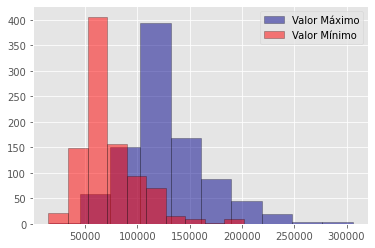

In [ ]:
# Aplicando um estilo aos plots
plt.style.use("ggplot")

# Criando gráfico
plt.hist(df_raw['Valor Máximo'],ec = "k", label= 'Valor Máximo', alpha= 0.5, color = "darkblue")
plt.hist(df_raw['Valor Mínimo'],ec = "k", label= 'Valor Mínimo', alpha= 0.5, color = "red")

# Colocando a legenda no melhor lugar
plt.legend(loc='best')

# Mostrando gráfico
plt.show()

Text(0.5, 1.0, 'Salários máximo e mínimo x cargo')

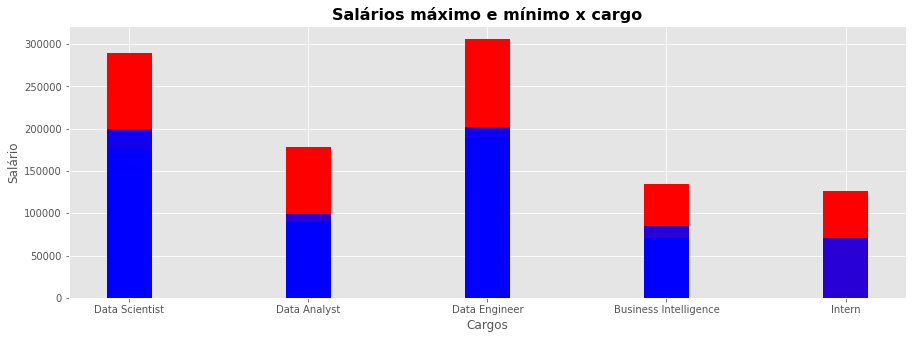

In [ ]:
# Definindo a largura das barras 
barWidth = 0.25

# Aumentando o gráfico
plt.figure(figsize= (15, 5))

# Criando as barras
plt.bar(x = df_raw['Job Title'],
        height = df_raw['Valor Máximo'],
        width = barWidth,
        color = 'r')

plt.bar(x = df_raw['Job Title'],
        height = df_raw['Valor Mínimo'],
        width = barWidth,
        color ='b',
        alpha= .6)


# A label para o eixo X
plt.xlabel('Cargos')

# A label para o eixo Y
plt.ylabel('Salário')

# O título do gráfico
plt.title('Salários máximo e mínimo x cargo',fontsize=16, fontweight='bold')

criar novo df c/ as colunas job title e os valores de salario

groupby cargo  escolher a medida

In [ ]:
# Definindo a largura das barras 
barWidth = 0.25

# Aumentando o gráfico
plt.figure(figsize= (20, 5))

size_sorted = df_raw['Size'].sort_values(')

# Criando as barras
plt.bar(size_sorted,
        height = df_raw['Valor Máximo'],
        width = barWidth,
        color ='r')

plt.bar(size_sorted,
        height = df_raw['Valor Mínimo'],
        width = barWidth,
        color ='b')

# A label para o eixo X
plt.xlabel('# de Funcionários')

# A label para o eixo Y
plt.ylabel('Salário')
1 to 50 employees 1 to 50 employees1 to 50 employees  
# O título do gráfico
plt.title('Salários máximo e mínimo x # de Funcionários',fontsize=16, fontweight='bold')

SyntaxError: ignored

In [ ]:
size_sorted.value_counts()

1001 to 5000 employees     167
201 to 500 employees       160
51 to 200 employees        154
10000+ employees           151
501 to 1000 employees      141
5001 to 10000 employees     75
1 to 50 employees           58
Unknown                     26
Name: Size, dtype: int64

Tentar ordenar as colunas do pandas em relacao ao Size

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


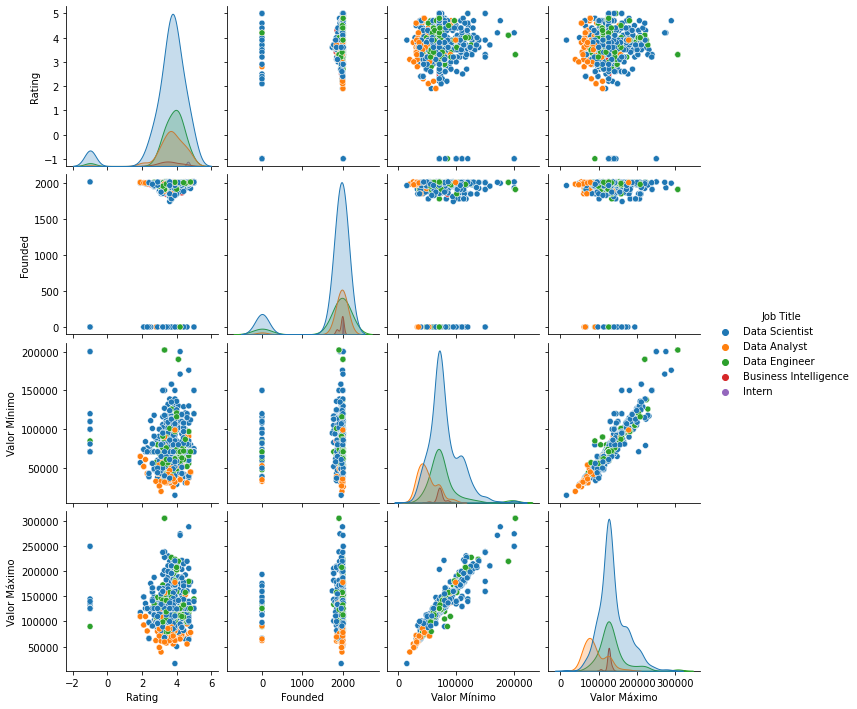

In [ ]:
sns.pairplot(df_raw, hue='Job Title')

In [ ]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins = 20, figsize = (8, 6), alpha = .5)

>Proximos passos:

Realizar os estudos 

media de salario por pais - coluna e pizza

dados relacionado a localidade

Especificar mais o estudo





# V - Modelagem

In [ ]:
df_numeric = df_raw.select_dtypes(include=['float64', 'int'])
df_numeric.head()

,Rating,Founded,Valor Mínimo,Valor Máximo
0,3.8,1973,53000.0,91000.0
1,3.4,1984,63000.0,112000.0
2,4.8,2010,80000.0,90000.0
3,3.8,1965,56000.0,97000.0
4,2.9,1998,86000.0,143000.0


In [ ]:
# correlation matrix
cor = df_numeric.corr()
cor

,Rating,Founded,Valor Mínimo,Valor Máximo
Rating,1.000000,0.486271,-0.007719,0.015373
Founded,0.486271,1.000000,-0.003367,0.024924
Valor Mínimo,-0.007719,-0.003367,1.000000,0.939667
Valor Máximo,0.015373,0.024924,0.939667,1.000000


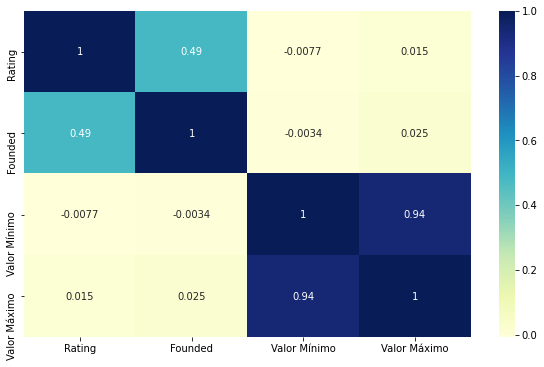

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(10,6))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df_raw.columns

Index(['Job Title', 'Rating', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Valor Mínimo',
       'Valor Máximo', 'Cidade', 'Estado'],
      dtype='object')

In [ ]:
# split into X and y
X = df_raw.loc[:, ['Job Title', 'Rating', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Valor Máximo', 'Cidade', 'Estado']]

y = df_raw['Valor Mínimo']

X

,Job Title,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Valor Máximo,Cidade,Estado
0,Data Scientist,3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),91000.0,Goleta,CA
1,Data Scientist,3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),112000.0,Baltimore,MD
2,Data Scientist,4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),90000.0,Clearwater,FL
3,Data Scientist,3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),97000.0,Richland,WA
4,Data Scientist,2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,143000.0,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,Data Engineer,4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),133000.0,San Francisco,CA
952,Data Scientist,2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,91000.0,Pittsburgh,PA
953,Data Scientist,3.2,"Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),160000.0,Chadds Ford,PA
954,Data Engineer,4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),126000.0,Portland,OR


In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_raw_categorical = X.select_dtypes(include=['object'])
df_raw_categorical.head()

,Job Title,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Cidade,Estado
0,Data Scientist,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Goleta,CA
1,Data Scientist,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Baltimore,MD
2,Data Scientist,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),Clearwater,FL
3,Data Scientist,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),Richland,WA
4,Data Scientist,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,New York,NY


In [ ]:
# convert into dummies
df_raw_dummies = pd.get_dummies(df_raw_categorical, drop_first=True)
df_raw_dummies.head()

,Job Title_Data Analyst,Job Title_Data Engineer,Job Title_Data Scientist,Job Title_Intern,"Location_Alabaster, AL","Location_Alameda, CA","Location_Albuquerque, NM","Location_Alexandria, VA","Location_Aliso Viejo, CA","Location_Allendale, NJ","Location_Allentown, PA","Location_Amsterdam, NY","Location_Anchorage, AK","Location_Ann Arbor, MI","Location_Annapolis Junction, MD","Location_Arlington, VA","Location_Armonk, NY","Location_Arvada, CO","Location_Ashburn, VA","Location_Atlanta, GA","Location_Atlanta, IN","Location_Aurora, CO","Location_Austin, TX","Location_Baltimore, MD","Location_Beavercreek, OH","Location_Bedford, MA","Location_Bellevue, WA","Location_Bethesda, MD","Location_Birmingham, AL","Location_Bloomington, IL","Location_Bloomington, MN","Location_Blue Bell, PA","Location_Boise, ID","Location_Boston, MA","Location_Brisbane, CA","Location_Bristol, TN","Location_Burbank, CA","Location_Burlington, MA","Location_Camarillo, CA","Location_Cambridge, MA",...,Estado_ China,Estado_ DC,Estado_ FL,Estado_ France,Estado_ GA,Estado_ Germany,Estado_ IA,Estado_ ID,Estado_ IL,Estado_ IN,Estado_ India,Estado_ Japan,Estado_ LA,Estado_ MA,Estado_ MD,Estado_ MI,Estado_ MN,Estado_ MO,Estado_ NC,Estado_ NE,Estado_ NJ,Estado_ NV,Estado_ NY,Estado_ OH,Estado_ OR,Estado_ PA,Estado_ PR,Estado_ RI,Estado_ SC,Estado_ Singapore,Estado_ South Korea,Estado_ Spain,Estado_ Switzerland,Estado_ TN,Estado_ TX,Estado_ UT,Estado_ United Kingdom,Estado_ VA,Estado_ WA,Estado_ WI
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop categorical variables 
X = X.drop(list(df_raw_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X
X = pd.concat([X, df_raw_dummies], axis=1)

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Rating', 'Founded', 'Valor Máximo', 'Job Title_Data Analyst',
       'Job Title_Data Engineer', 'Job Title_Data Scientist',
       'Job Title_Intern', 'Location_Alabaster, AL', 'Location_Alameda, CA',
       'Location_Albuquerque, NM',
       ...
       'Estado_ South Korea', 'Estado_ Spain', 'Estado_ Switzerland',
       'Estado_ TN', 'Estado_ TX', 'Estado_ UT', 'Estado_ United Kingdom',
       'Estado_ VA', 'Estado_ WA', 'Estado_ WI'],
      dtype='object', length=845)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print(f'Training Sample:{X_train.shape}')
print(f'Testing Sample:{X_test.shape}')

Training Sample:(652, 845)
Testing Sample:(280, 845)


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 7.08680721e+02 -4.70800645e+03  2.66972936e+04  1.99560894e+04
  2.40202656e+04  2.89205818e+04  1.44576700e+16 -1.21003410e+17
  1.16526823e+17 -6.99952616e+02 -5.09171923e+03  9.72099193e+16
  8.45246682e+16 -3.45568198e+16 -1.79270220e+17 -1.66548477e+17
  1.04848517e+17  1.98782436e+17 -5.19803713e+03  2.45412978e+16
 -6.12692889e+02  6.77019873e+16 -4.56803110e+03  1.96963034e+17
 -1.00092587e+17 -1.22925714e+04 -3.46823560e+03 -4.82335989e+03
  4.23547957e+16  1.17137260e+17  5.47008300e+16 -3.02629295e+17
  1.29299584e+17 -3.79042543e+17 -1.00435609e+17 -3.89362578e+17
 -8.17200000e+03 -1.36325273e+17  8.68006323e+16 -1.57773708e+17
  9.48421473e+16  3.68172038e+17 -8.69600000e+03 -6.85617189e+17
  2.79768017e+17  1.44554068e+17 -2.74206265e+17 -2.73600000e+03
 -6.64000000e+03  1.72718910e+17 -1.42200000e+03 -3.32181510e+17
 -2.23200000e+03 -1.12240000e+04 -2.70400000e+03 -1.13857600e+17
  1.51221643e+17  1.35206384e+17 -5.34874547e+15 -4.67059414e+15
  3.66192702e+16 -3.42492

In [ ]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

-1.1262344110508189e+28


In [ ]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

-3.314987114243543e+26


In [ ]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(lm, 6)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# predict
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.0007146449796928689


In [ ]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,"Location_Aliso Viejo, CA","Location_Bethesda, MD","Location_Burbank, CA","Location_Cupertino, CA","Location_Exton, PA","Location_Sunnyvale, CA","Headquarters_Bedford, MA","Headquarters_Burbank, CA","Headquarters_Exton, PA","Headquarters_South San Francisco, CA",Industry_Preschool & Child Care,Industry_Telecommunications Services,Cidade_Bedford,Cidade_South San Francisco,Estado_ South Korea
111,1.0,-0.046374,-0.032774,-0.065653,-0.046374,-0.046374,-0.046374,-0.104144,-0.065653,-0.046374,7.818781,-0.032774,-0.065653,-0.104144,7.818781,-0.056827
432,1.0,-0.046374,-0.032774,-0.065653,-0.046374,-0.046374,-0.046374,-0.104144,-0.065653,-0.046374,-0.127897,-0.032774,-0.065653,-0.104144,-0.127897,-0.056827
105,1.0,-0.046374,-0.032774,-0.065653,-0.046374,-0.046374,-0.046374,-0.104144,-0.065653,-0.046374,-0.127897,-0.032774,-0.065653,-0.104144,-0.127897,-0.056827
511,1.0,-0.046374,-0.032774,-0.065653,-0.046374,-0.046374,-0.046374,-0.104144,-0.065653,-0.046374,-0.127897,-0.032774,-0.065653,-0.104144,-0.127897,-0.056827
672,1.0,-0.046374,-0.032774,-0.065653,-0.046374,-0.046374,-0.046374,-0.104144,-0.065653,-0.046374,-0.127897,-0.032774,-0.065653,-0.104144,-0.127897,-0.056827


In [ ]:
y_train.values.reshape(-1,1)

In [ ]:
# fitting the model with 15 variables

lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()
print(lm_15.summary())

ValueError: ignored

In [ ]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 372 to 517
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 280 non-null    float64
 1   Location_Aliso Viejo, CA              280 non-null    float64
 2   Location_Bethesda, MD                 280 non-null    float64
 3   Location_Burbank, CA                  280 non-null    float64
 4   Location_Cupertino, CA                280 non-null    float64
 5   Location_Exton, PA                    280 non-null    float64
 6   Location_Sunnyvale, CA                280 non-null    float64
 7   Headquarters_Bedford, MA              280 non-null    float64
 8   Headquarters_Burbank, CA              280 non-null    float64
 9   Headquarters_Exton, PA                280 non-null    float64
 10  Headquarters_South San Francisco, CA  280 non-null    float64
 11  Industry_Preschoo

NameError: ignored

In [ ]:
# r-squared
r2_score(y_test, y_pred)

0.0007146449796928689

In [ ]:
# subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

# subsetting training data for 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)


# fitting the model with 6 variables
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()   
print(lm_6.summary())


# making predictions using rfe_6 sm model
X_test_rfe_6 = X_test[col_6]


# Adding a constant  
X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')
X_test_rfe_6.info()


# # Making predictions
y_pred = lm_6.predict(X_test_rfe_6)

ValueError: ignored

In [ ]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.0007146449796928689

In [ ]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

In [ ]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [ ]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [ ]:
# summary
lm_n.summary()

NameError: ignored

In [ ]:
# results 
r2_score(y_test, y_pred)

0.0007146449796928689

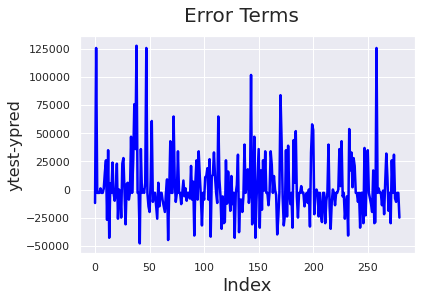

In [ ]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


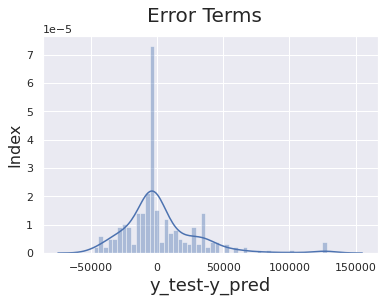

In [ ]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [ ]:
# mean
np.mean(y_test-y_pred)

2442.6566170026

In [ ]:
sns.distplot(cars['price'],bins=50)
plt.show()

NameError: ignored

In [ ]:
# multicollinearity
predictors = ['carwidth', 'curbweight', 'enginesize', 
             'enginelocation_rear', 'car_company_bmw', 'car_company_porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

KeyError: ignored

# VI - Comunicação e visualização

# VII - Implementação e manutenção (opcional)